### Association Rule = Book dataset


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows',None)

In [47]:
books =pd.read_csv('book (2).csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [48]:
books.shape

(2000, 11)

In [49]:
books.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


In [50]:
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

No null values

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Dell\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


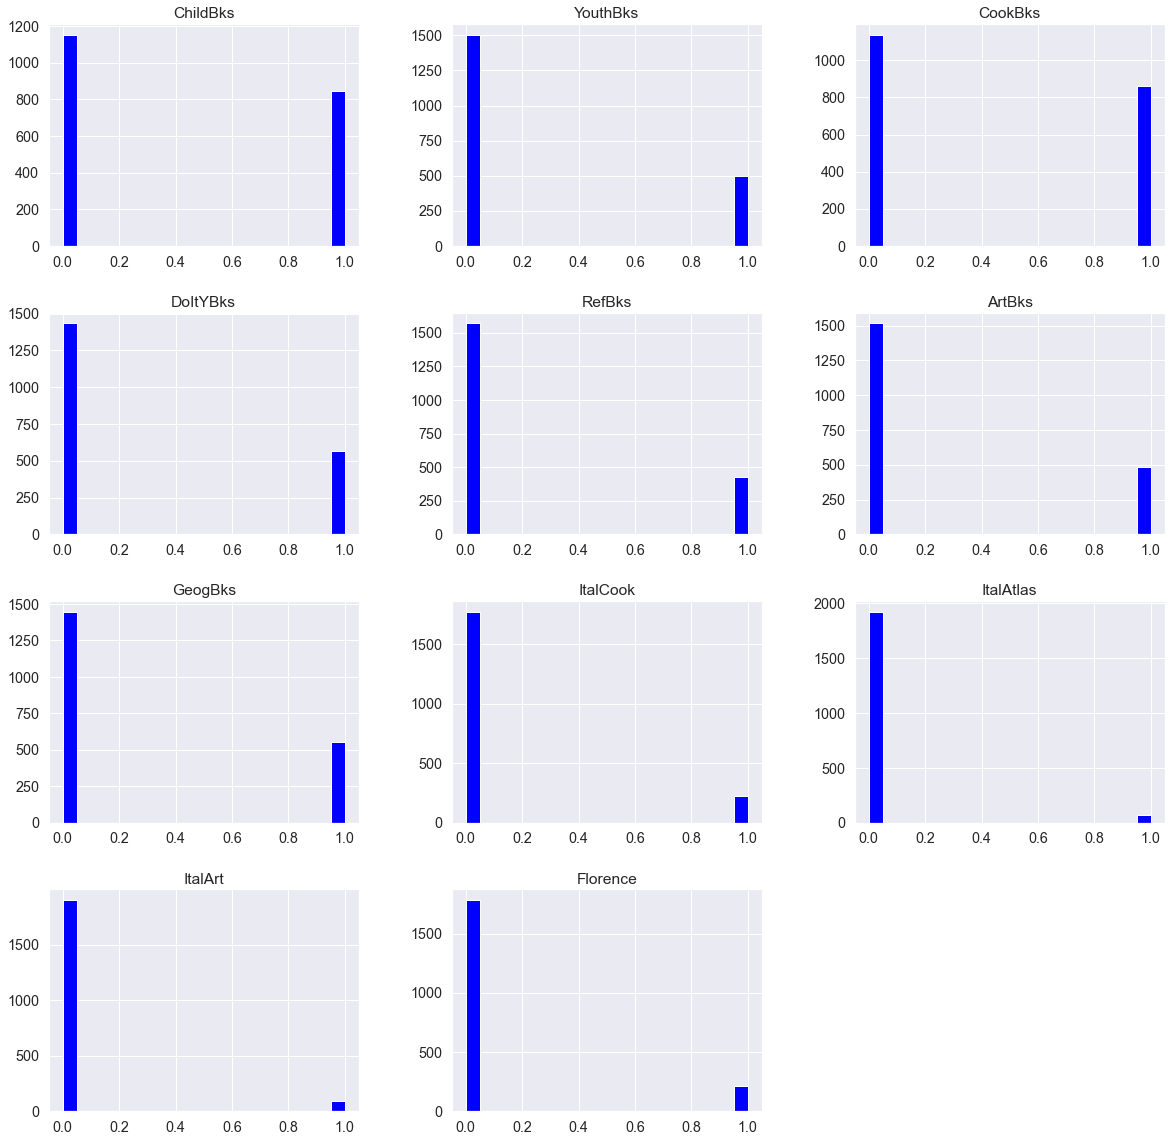

In [51]:
##Check count of 0 and 1 each column from dataframe
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=books.hist(bins=20,color='blue' )

Most of the column count is 0 

<BarContainer object of 11 artists>

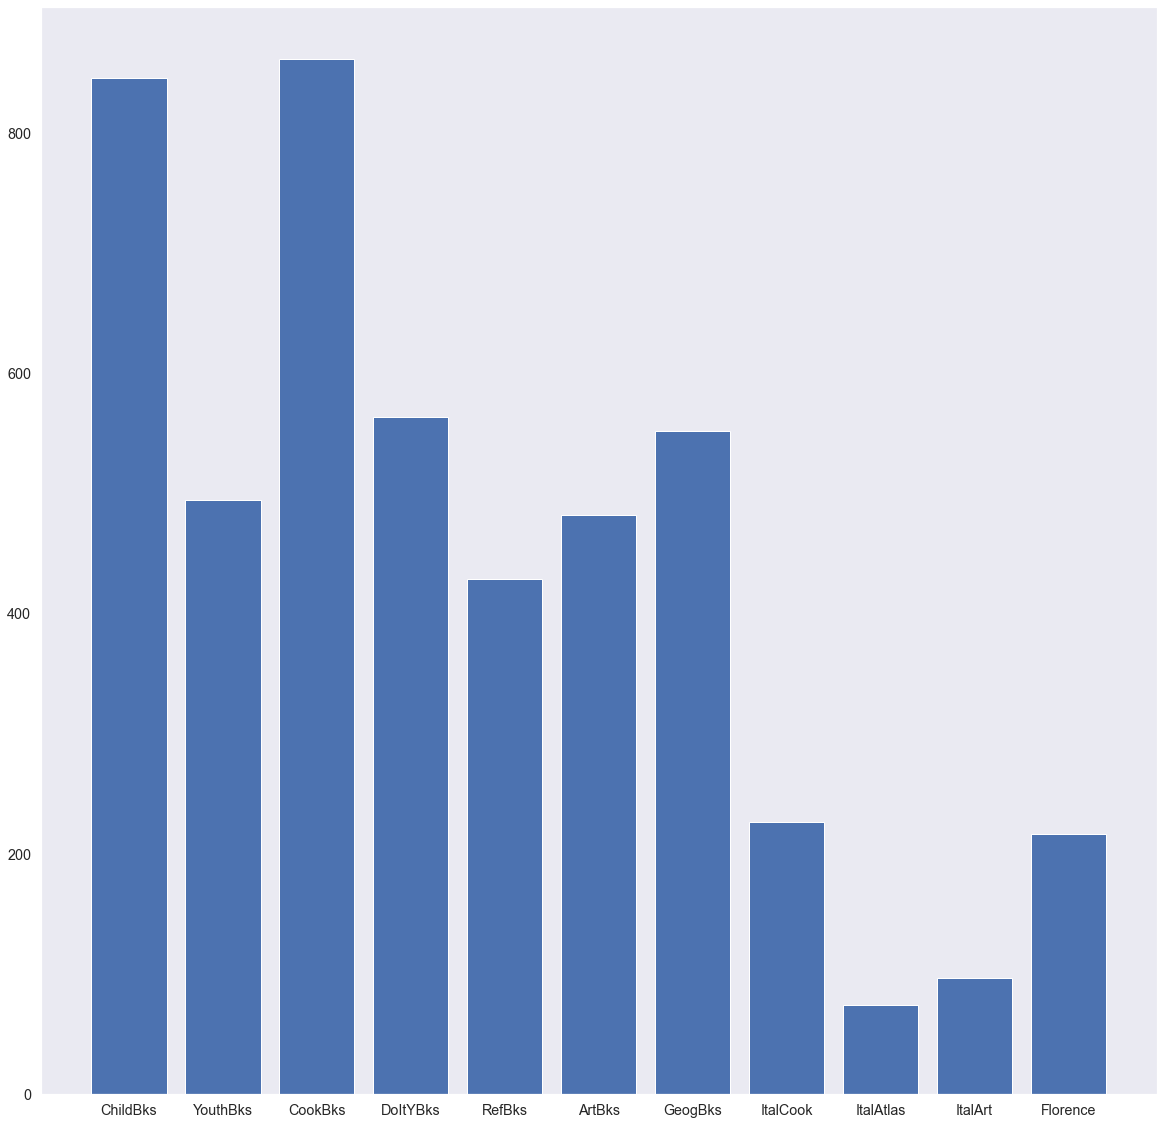

In [52]:
plt.bar(col_names, book_count)

Count of cookbooks and child books are very high

### Aprori Algorithm 
at min_support =0.1

In [75]:
frequent_itemset = apriori(books, min_support = 0.1,use_colnames=True)
frequent_itemset

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [76]:
rules = association_rules(frequent_itemset ,metric = 'confidence',min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105


with confidence of 40% we got 69 association combinations of books

In [57]:
rules['consequents'].value_counts()

(CookBks)              15
(ChildBks)             13
(GeogBks)              11
(DoItYBks)             10
(ArtBks)                7
(ChildBks, CookBks)     5
(YouthBks)              4
(RefBks)                2
(ChildBks, GeogBks)     1
(DoItYBks, CookBks)     1
(CookBks, GeogBks)      1
Name: consequents, dtype: int64

In [58]:
rules['antecedents'].value_counts()

(ArtBks)                9
(GeogBks)               7
(YouthBks)              6
(DoItYBks)              6
(RefBks)                5
(ChildBks, CookBks)     5
(CookBks)               3
(CookBks, GeogBks)      3
(ChildBks)              3
(DoItYBks, CookBks)     3
(ChildBks, GeogBks)     3
(ArtBks, CookBks)       3
(ChildBks, ArtBks)      2
(ArtBks, GeogBks)       2
(DoItYBks, GeogBks)     2
(ChildBks, DoItYBks)    2
(CookBks, RefBks)       1
(ChildBks, RefBks)      1
(YouthBks, CookBks)     1
(ChildBks, YouthBks)    1
(ItalCook)              1
(DoItYBks, ArtBks)      1
Name: antecedents, dtype: int64

In [59]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x))
rules[rules['lhs items']>1].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
55,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
59,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
66,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
68,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
40,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2
56,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.2410,0.1020,0.523077,2.170444,0.055005,1.591452,2
61,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626,2
48,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319,2
63,"(DoItYBks, CookBks)",(GeogBks),0.1875,0.2760,0.1085,0.578667,2.096618,0.056750,1.718354,2
53,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

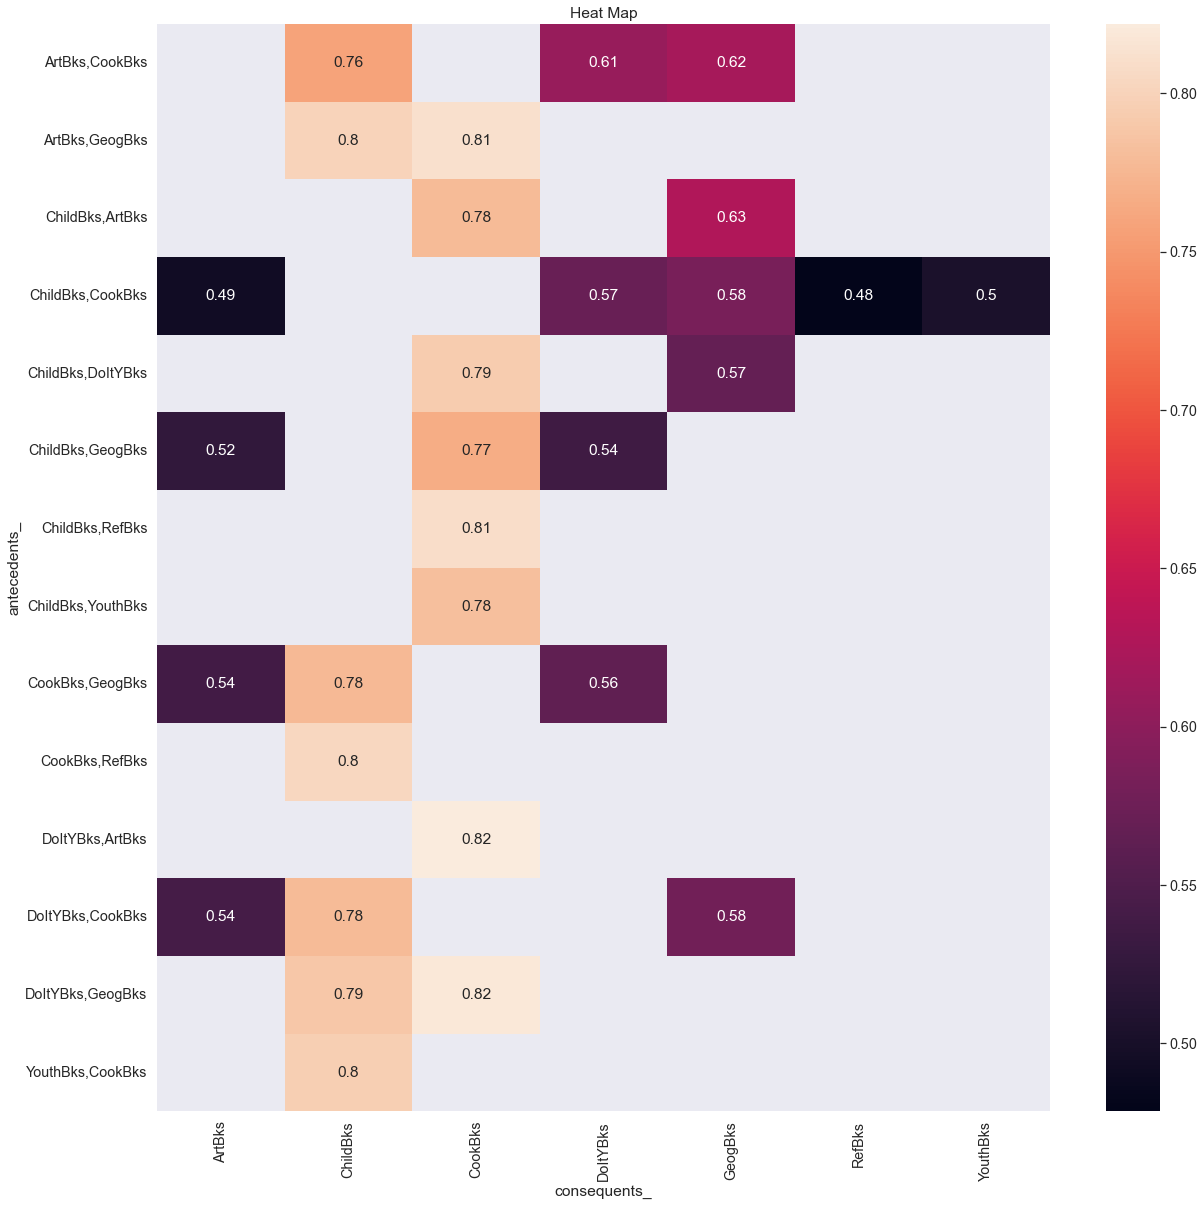

In [60]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_',values='confidence')
sns.heatmap(pivot,annot = True)
plt.title('Heat Map')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

childBks and CookBks highly correlated with antecedents when metric confidence and threshold 0.4

#### Let's use metic lift at threshold 0.4

In [85]:
rules = association_rules(frequent_itemset ,metric = 'lift',min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


with lift of 40% we got 100 association combinations of books

In [86]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x))
rules[rules['lhs items']>1].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
52,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2
77,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.2410,0.1020,0.523077,2.170444,0.055005,1.591452,2
84,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626,2
64,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319,2
88,"(DoItYBks, CookBks)",(GeogBks),0.1875,0.2760,0.1085,0.578667,2.096618,0.056750,1.718354,2
71,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673,2


with lift of 40% we got 99 association combinations of books

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

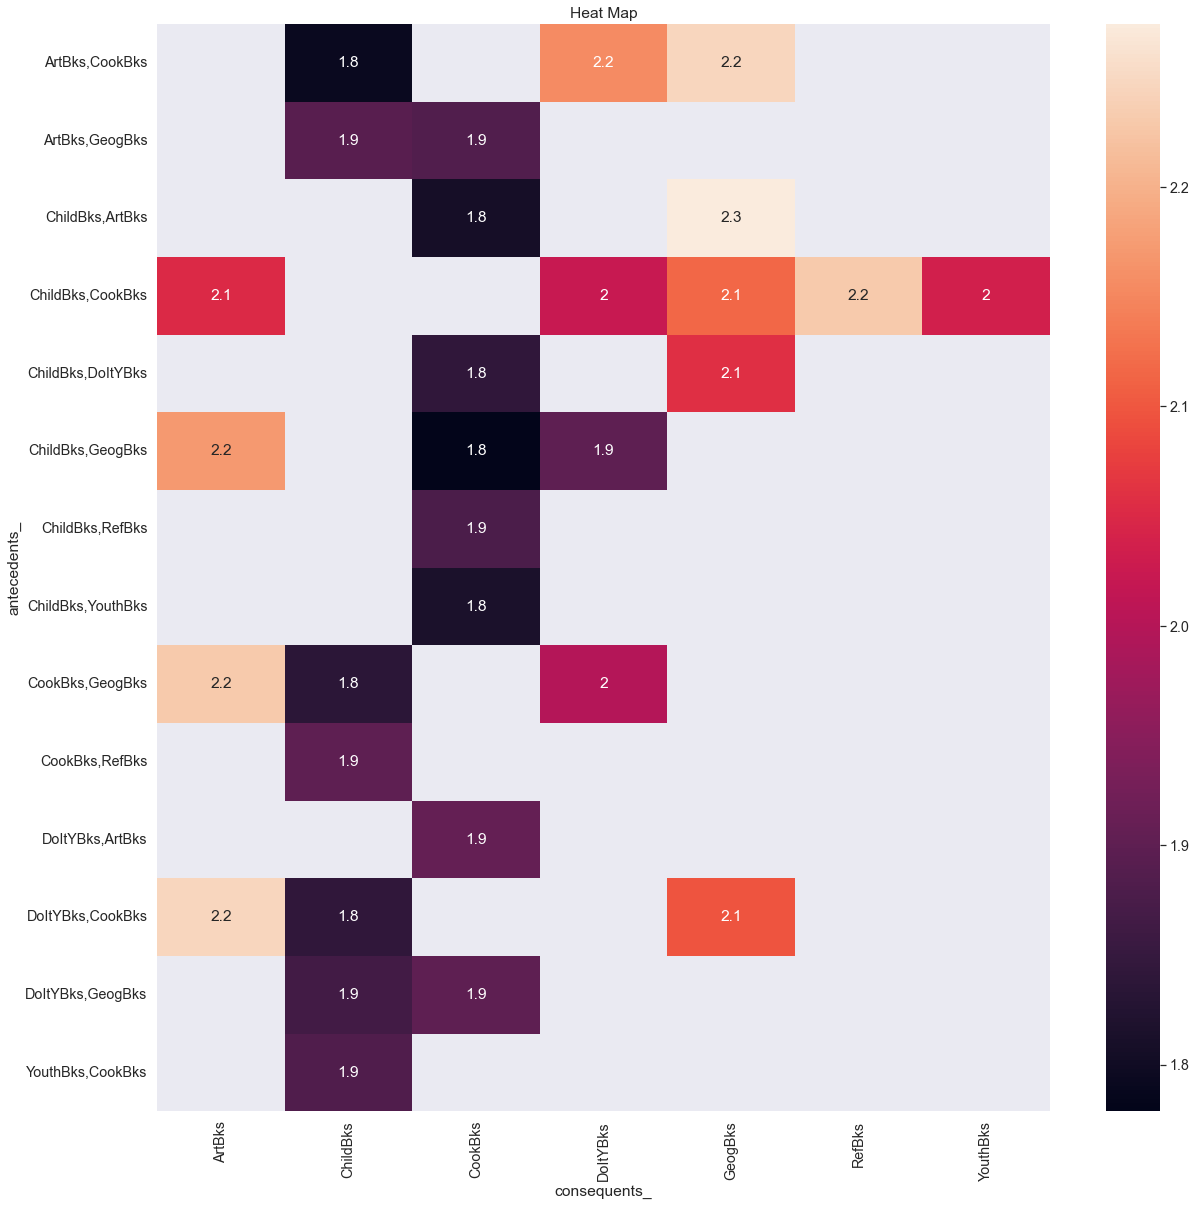

In [87]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_',values='lift')
sns.heatmap(pivot,annot = True)
plt.title('Heat Map')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

in lift matric childBks and CookBks has lower correlated with antecedents

### Aprori Algorithm
at min_support =0.2

In [95]:
frequent_itemset1 = apriori(books, min_support = 0.2,use_colnames=True)
frequent_itemset1

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [99]:
rules1 = association_rules(frequent_itemset1 ,metric = 'confidence',min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


with confidence of 30% we got 2 association combinations of books

In [101]:
rules1 = association_rules(frequent_itemset1 ,metric = 'lift',min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


with lift of 30% we got 2 association combinations of books
 ChildBks and CookBkas assocated 